In [1]:
#load necessary libararies
import pandas as pd
import numpy as np
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif,VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,BisectingKMeans
from sklearn.preprocessing import (
    MaxAbsScaler,
    MinMaxScaler,
    Normalizer,
    PowerTransformer,
    QuantileTransformer,
    RobustScaler,
    StandardScaler,
    minmax_scale
)
from yellowbrick.cluster import SilhouetteVisualizer,KElbowVisualizer
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, Birch, MiniBatchKMeans, AffinityPropagation, MeanShift, SpectralClustering, OPTICS, SpectralBiclustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,accuracy_score,recall_score,precision_score,make_scorer
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline



import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('data_final.csv')
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,flights_money_saved,hotels_money_saved,converted,condition,total_hotel_net_spend,total_flight_net_spend,total_net_spend,discount_hotel_propotion,discount_flight_propotion,married&has_children,home_country_encoded,home_city_encoded,home_airport_encoded,total_clicks_b,recency_b,frequency_b,age_b,avg_session_time_b,cancellation_ratio,cancellation_ratio_b,average_nights_b,total_hotel_bookings_b,total_hotel_net_spend_b,total_flight_bookings_b,flights_with_bags_morethan_seats_b,flights_with_morethan_onebag_b,total_flight_net_spend_b,flight_plus_hotels_b,total_net_spend_b,avg_flight_discount_amount_b,total_amount_of_flight_discount,total_amount_of_flight_discount_b,flight_money_saved_b,discount_flight_propotion_b,avg_hotel_discount_amount_b,total_amount_of_hotel_discount,total_amount_of_hotel_discount_b,hotels_money_saved_b,discount_hotel_propotion_b
0,23557,82,8,0,3802,0.00,0.000000,14.0,2,64,0,1,0,0,76.625000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.25,0.25,0.25,0.25,0.25,0.0,0.000,1.0,0.1,0.0,0.0,0.000000,0,0.0,0.0,10.0,0,132,1,2,3670,0.00,3670.00,0.5,0.0,0,1,60,54,0,0,0,2,0,0.00,0.0,8.0,1.0,8.0,0,0,0,0.0,0,4.0,0,0.0,0,0.0,0.0,8,0.25,8.0,8.0,4.0
1,94883,73,8,1,130,864.09,0.000000,109.0,4,51,0,1,0,0,67.750000,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000,1.0,0.1,0.0,0.0,2902.670807,2,0.0,0.0,0.5,0,0,1,3,130,864.09,994.09,0.0,0.0,0,1,38,66,0,2,1,2,0,0.00,0.0,1.0,1.0,1.0,4,0,0,2.0,4,1.0,0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0
2,101486,131,8,0,2199,189.91,0.000000,41.0,3,50,0,1,1,0,122.250000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00,0.00,0.00,0.00,0.00,2.0,0.075,0.0,0.0,0.0,0.0,995.681600,1,0.0,0.0,4.0,0,0,1,3,2199,189.91,2388.91,0.0,0.0,1,1,92,125,2,1,0,2,2,0.00,0.0,4.0,1.0,4.0,1,0,0,1.0,1,2.0,0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0
3,101961,126,8,2,2429,1242.66,0.000727,36.0,10,43,0,1,0,0,117.750000,1.0,5.0,0.1,0.1,0.1,0.1,0.1,0.0,5.0,0.00,0.00,0.00,0.00,0.00,1.0,0.200,1.0,0.1,0.0,0.0,6832.845483,5,0.0,0.0,3.8,5,0,1,3,2429,1237.66,3666.66,0.0,0.2,0,1,9,12,1,1,3,1,1,0.00,0.0,4.0,8.0,4.0,8,0,0,4.0,8,4.0,4,0.1,4,1.0,1.0,0,0.00,0.0,0.0,0.0
4,106907,240,8,10,8514,27804.12,0.000000,1.0,4,45,0,1,1,1,758.915066,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.00,0.00,0.00,0.00,0.0,0.000,0.0,0.0,0.0,0.0,12797.480541,1,0.0,1.0,11.0,0,0,1,3,8514,27804.12,36318.12,0.0,0.0,1,1,51,128,3,0,1,1,3,0.25,2.0,8.0,1.0,8.0,1,0,1,8.0,1,8.0,0,0.0,0,0.0,0.0,0,0.00,0.0,0.0,0.0


In [4]:
df.columns

Index(['user_id', 'total_clicks', 'total_sessions', 'total_bags',
       'total_hotel_spend', 'total_flights_spend', 'ads_per_km', 'recency',
       'frequency', 'age', 'gender', 'married', 'has_children',
       'total_cancellation', 'avg_session_time',
       'total_num_of_flight_discount', 'total_flight_bookings',
       'avg_flight_discount_amount', 'median_flight_discount_amount',
       'mode_flight_discount_amount', 'max_flight_discount_amount',
       'min_flight_discount_amount', 'total_num_of_hotel_discount',
       'total_hotel_bookings', 'avg_hotel_discount_amount',
       'median_hotel_discount_amount', 'mode_hotel_discount_amount',
       'max_hotel_discount_amount', 'min_hotel_discount_amount',
       'total_num_of_flight_discount_discarded',
       'avg_flight_discount_amount_discarded',
       'total_num_of_hotel_discount_discarded',
       'avg_hotel_discount_amount_discarded',
       'flight_discount_leads_to_hotel_booking',
       'hotel_discount_leads_to_flight_boo

In [5]:
df_all=df.copy()

In [6]:
features=[ 'married&has_children',
       'cancellation_ratio_b',
       'average_nights_b', 'total_hotel_bookings_b', 'total_hotel_net_spend_b',
       'total_flight_bookings_b', 'flights_with_bags_morethan_seats_b',
       'flights_with_morethan_onebag_b', 'total_flight_net_spend_b',
       'flight_plus_hotels_b', 'total_net_spend_b',
       'avg_flight_discount_amount_b',
       'total_amount_of_flight_discount_b', 'flight_money_saved_b',
       'avg_hotel_discount_amount_b',
       'total_amount_of_hotel_discount_b', 'hotels_money_saved_b']

In [7]:
# df['free_hotel_meal'] = df.apply(lambda x: 2 * x['average_nights_b'] * x['average_nights_b'] if x['condition'] == 2 else  x['average_nights_b'] , axis=1)
# df['free_bags']=df.apply(lambda x : 2 * x['total_flight_bookings_b'] * x['flights_with_bags_morethan_seats_b'] if x['condition'] == 1 else x['total_flight_bookings_b'] * x['flights_with_bags_morethan_seats_b'],axis=1)
# df['free_night_with_flight']=df.flight_plus_hotels_b**2
# df['free_hotel_discount']=df.apply(lambda x: 2 * x['hotels_money_saved_b'] * x['total_amount_of_hotel_discount_b'] if x['condition'] == 2 else  x['hotels_money_saved_b'] * x['discount_hotel_propotion_b'], axis=1)
# df['free_flight_discount']=df.apply(lambda x: 2 * x['flight_money_saved_b'] * x['total_amount_of_flight_discount_b'] if x['condition'] == 1 else  x['flight_money_saved_b'] * x['discount_flight_propotion_b'], axis=1)
# df['bargain']=df.free_hotel_discount*df.free_flight_discount
# df['cancel']=df.cancellation_ratio_b**3

- Designing perks features based on the most relevant features.

In [8]:
df_all['free_hotel_meal']=df['free_hotel_meal'] =df.average_nights_b**2
df_all['free_bags']=df['free_bags']=df.flights_with_bags_morethan_seats*8
df_all['free_night_with_flight']=df['free_night_with_flight']=df.flight_plus_hotels_b**2
df_all['free_hotel_discount']=df['free_hotel_discount']=df.total_amount_of_hotel_discount_b*df.hotels_money_saved_b
df_all['free_flight_discount']=df['free_flight_discount']=df.total_amount_of_flight_discount_b*df.flight_money_saved_b
df_all['cancel']=df['cancel']=df.cancellation_ratio_b**2



In [9]:
features=['cancel','free_hotel_meal','free_bags','free_night_with_flight','free_hotel_discount','free_flight_discount']

In [10]:
#Creating data frame with only perks
df=df[features]

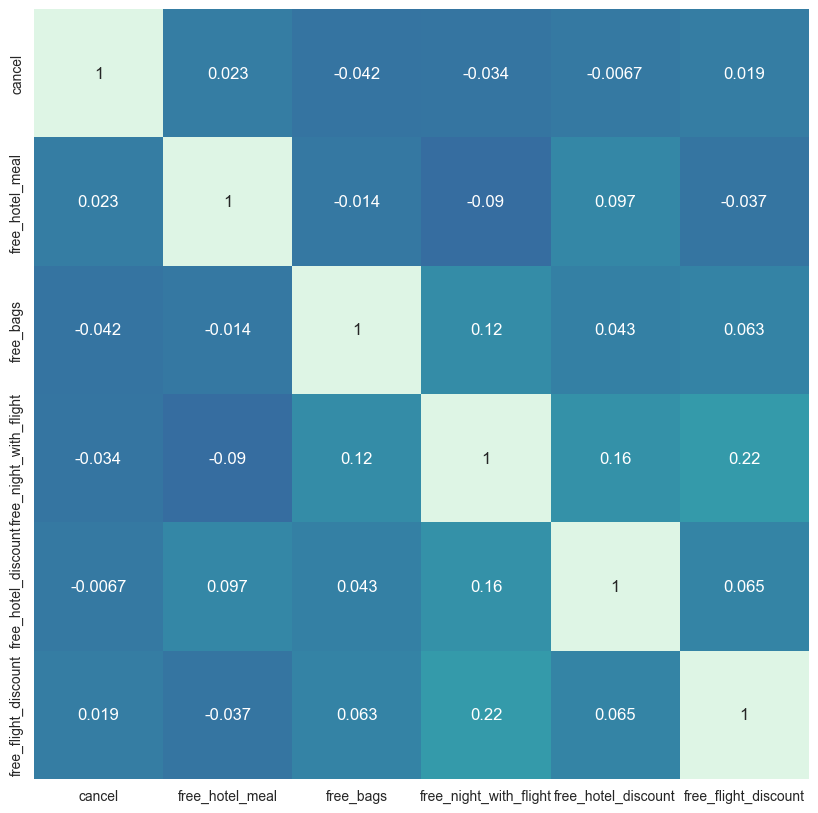

In [11]:
#correlation matrix
corrmat=df.corr(method='kendall')
# mask = np.triu(np.ones_like(corrmat), k=1)
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True, cmap='mako', center=0,cbar=False)
plt.show()

In [12]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df)
df_scaled=pd.DataFrame(scaled_data,columns=df.columns)


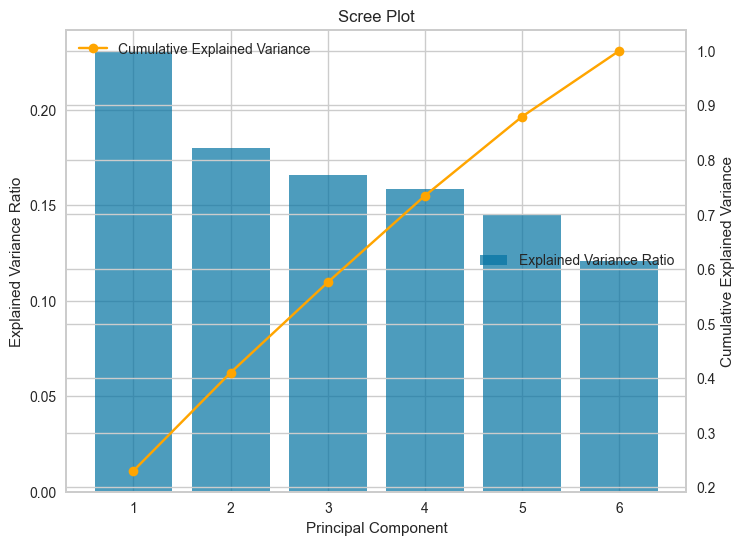

In [13]:
pca = PCA()
X_pca = pca.fit_transform(df_scaled)

# Visualize explained variance ratio and cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Create the plot
fig, ax1 = plt.subplots(figsize=(8, 6))

# Scree plot on the left y-axis
ax1.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center', label='Explained Variance Ratio')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.legend(loc='center right')

# Cumulative explained variance plot on the right y-axis
ax2 = ax1.twinx()
ax2.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', color='orange', label='Cumulative Explained Variance')
ax2.set_ylabel('Cumulative Explained Variance')
ax2.legend(loc='best')

# Show the combined plot
plt.show()

In [14]:
# pca = PCA(n_components=.99)
# pca.fit(df_scaled)
# PCA_ds = pd.DataFrame(pca.transform(df_scaled))


Elbow Method to determine the number of clusters to be formed:


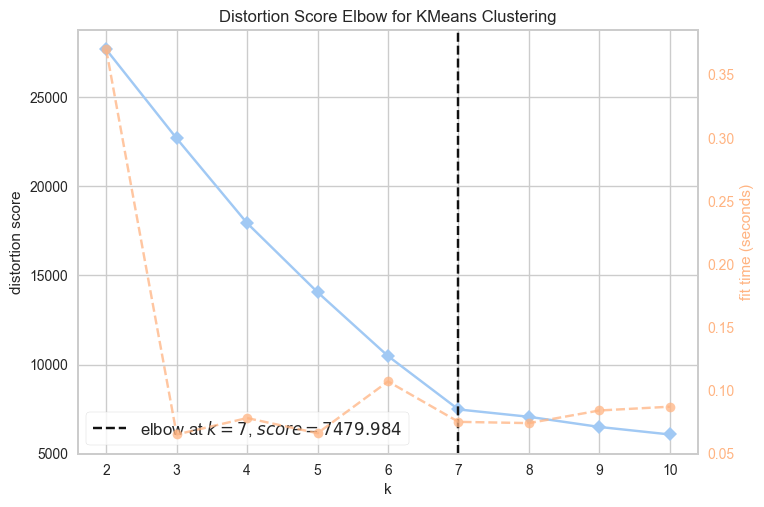

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_scaled)
sns.set_palette('pastel')
Elbow_M.show()

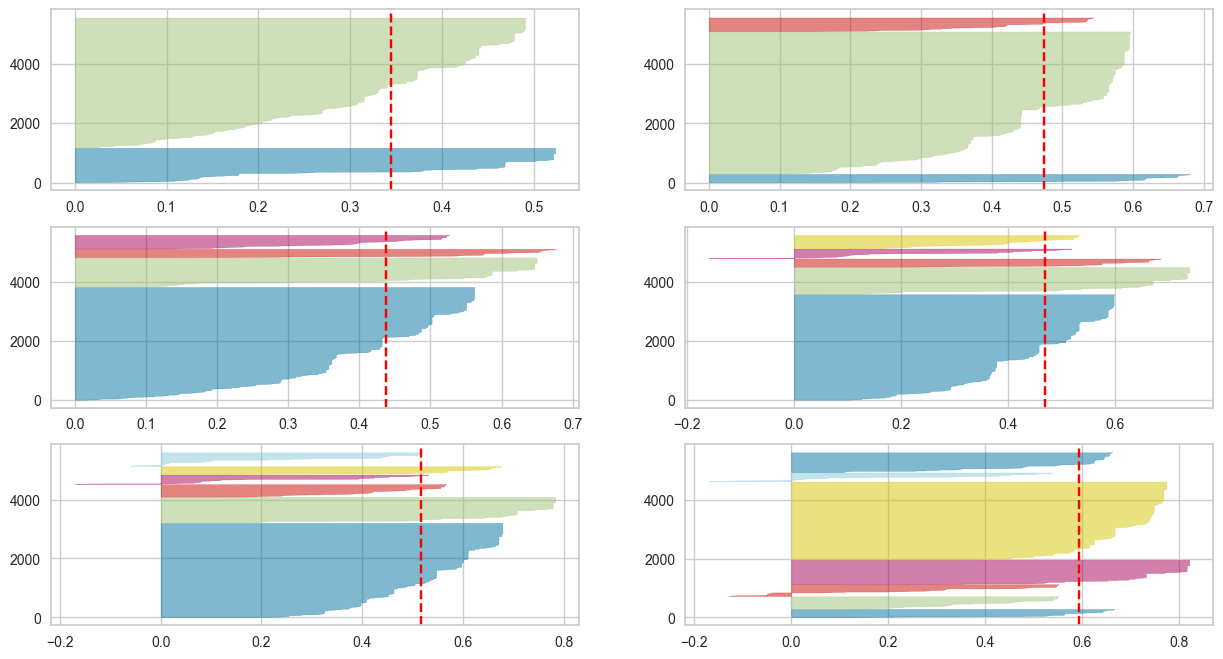

In [17]:
fig, ax = plt.subplots(3, 2, figsize=(15,8))
for i in [2, 3, 4, 5,6,7]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    '''
    
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_scaled) 

In [18]:

# Define clustering algorithms
algorithms = {
    'KMeans': KMeans(n_clusters=7),
    'MiniBatchKMeans': MiniBatchKMeans(n_clusters=7, batch_size=100),
    'Agglomerative': AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=7),
    'DBSCAN': DBSCAN(),
    'Birch': Birch(n_clusters=7),
    # 'AffinityPropagation': AffinityPropagation(),
    'MeanShift': MeanShift(),
    'SpectralClustering': SpectralClustering(n_clusters=7),
    'OPTICS': OPTICS(min_samples=3, xi=0.05, min_cluster_size=0.1),
    'GaussianMixture': GaussianMixture(init_params='k-means++',n_components=7),
    # 'SpectralBiclustering': SpectralBiclustering(n_clusters=4),
    # Add more clustering algorithms as needed
}

# Loop through each algorithm
for name, algorithm in algorithms.items():
    # Create a pipeline with the clustering algorithm
    if name == 'SpectralBiclustering':
        model = algorithm.fit(df_scaled)
        row_labels = model.row_labels_
        col_labels = model.column_labels_
    else:
        model = make_pipeline(algorithm)  # Include StandardScaler if needed
        # Fit and predict labels
        labels = model.fit_predict(df_scaled)
        
        if name == 'KMeans':
            inertia = algorithm.inertia_
            print(f"Inertia (Within-Cluster Sum of Squares) for {name}: {inertia}")
        
        # Print the number of unique labels
        print(f"Number of unique labels for {name}: {len(np.unique(labels))}")
        
        if len(np.unique(labels)) > 1:  # Check if there are at least two unique labels for silhouette score
            # Evaluate clustering performance
            silhouette = silhouette_score(df_scaled, labels)
            calinski_harabasz = calinski_harabasz_score(df_scaled, labels)
            davies_bouldin = davies_bouldin_score(df_scaled, labels)

            # Print results
            print(f"\nResults for {name}:")
            print(f"Silhouette Score: {silhouette}")
            print(f"Calinski-Harabasz Index: {calinski_harabasz}")
            print(f"Davies-Bouldin Index: {davies_bouldin}")
            #Davies-Bouldin Index: This metric is primarily suitable for algorithms that produce spherical clusters. It can be less informative for algorithms that generate elongated or irregularly shaped clusters. This might be the case for algorithms like MeanShift or AffinityPropagation.
        else:
            print(f"Not enough unique labels for silhouette score in {name}.")

Inertia (Within-Cluster Sum of Squares) for KMeans: 7469.610649061851
Number of unique labels for KMeans: 7

Results for KMeans:
Silhouette Score: 0.5942744372867808
Calinski-Harabasz Index: 3184.13573259374
Davies-Bouldin Index: 0.7147207025470381
Number of unique labels for MiniBatchKMeans: 7

Results for MiniBatchKMeans:
Silhouette Score: 0.5941062660818188
Calinski-Harabasz Index: 3175.253766281668
Davies-Bouldin Index: 0.6717294320549586
Number of unique labels for Agglomerative: 7

Results for Agglomerative:
Silhouette Score: 0.48385476470999933
Calinski-Harabasz Index: 688.5047044441677
Davies-Bouldin Index: 0.7759476903585115
Number of unique labels for DBSCAN: 75

Results for DBSCAN:
Silhouette Score: 0.5487533744247594
Calinski-Harabasz Index: 461.3813867423923
Davies-Bouldin Index: 1.2216215576278948
Number of unique labels for Birch: 7

Results for Birch:
Silhouette Score: 0.5012098417583747
Calinski-Harabasz Index: 1840.89472594051
Davies-Bouldin Index: 0.8307099586050889


In [19]:
kmeans = KMeans(n_clusters=7)
kmeans.fit(df_scaled)

# Adding the cluster labels to the original data
df_all['cluster'] = kmeans.labels_
df['cluster'] = kmeans.labels_

In [20]:
df_all.groupby('cluster').mean()


,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,flights_money_saved,hotels_money_saved,converted,condition,total_hotel_net_spend,total_flight_net_spend,total_net_spend,discount_hotel_propotion,discount_flight_propotion,married&has_children,home_country_encoded,home_city_encoded,home_airport_encoded,total_clicks_b,recency_b,frequency_b,age_b,avg_session_time_b,cancellation_ratio,cancellation_ratio_b,average_nights_b,total_hotel_bookings_b,total_hotel_net_spend_b,total_flight_bookings_b,flights_with_bags_morethan_seats_b,flights_with_morethan_onebag_b,total_flight_net_spend_b,flight_plus_hotels_b,total_net_spend_b,avg_flight_discount_amount_b,total_amount_of_flight_discount,total_amount_of_flight_discount_b,flight_money_saved_b,discount_flight_propotion_b,avg_hotel_discount_amount_b,total_amount_of_hotel_discount,total_amount_of_hotel_discount_b,hotels_money_saved_b,discount_hotel_propotion_b,free_hotel_meal,free_bags,free_night_with_flight,free_hotel_discount,free_flight_discount,cancel
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,540078.151408,158.010563,8.235915,1.605634,3347.133803,1305.726056,0.003473,65.295775,6.147887,42.538732,0.098592,0.436620,0.295775,0.112676,203.252269,0.366197,2.700704,0.042342,0.042342,0.041197,0.043486,0.041197,1.521127,3.221831,0.174813,0.174032,0.156866,0.194014,0.156514,1.080986,0.094208,0.690141,0.064278,0.059859,0.070423,5811.531595,2.422535,0.031690,0.077465,4.355739,22.704225,346.302817,1.0,2.943662,3000.830986,1283.021831,4283.852817,0.518503,0.139529,0.165493,0.823944,51.869718,76.077465,1.619718,1.316901,1.718310,1.056338,1.609155,0.014411,0.126761,4.253521,2.971831,4.964789,4.429577,0.063380,0.073944,3.711268,3.894366,4.781690,1.327465,0.047535,1.478873,1.158451,1.045775,5.876761,0.246317,7.267606,7.154930,4.362676,24.323944,0.253521,20.049296,51.380282,6.352113,0.161972
1,546162.738589,132.733308,8.197284,1.128253,1256.324029,1005.219076,0.002031,86.644662,4.394191,41.314975,0.115428,0.440588,0.342135,0.046398,146.493067,0.225198,2.152395,0.024481,0.024481,0.024274,0.024689,0.024274,0.224444,2.149000,0.019898,0.019898,0.019672,0.020124,0.019672,1.103357,0.098963,0.735949,0.061631,0.052056,0.050170,4714.604101,1.816673,0.000000,0.029800,2.510026,7.949830,10.695587,1.0,2.829498,1245.628442,997.269246,2242.897688,0.102735,0.106595,0.190117,0.832516,52.666918,77.003395,1.227084,1.699359,1.060355,0.979630,1.221803,0.005837,0.046398,2.091664,1.542437,2.463976,3.412674,0.000000,0.029046,2.852508,2.778951,2.597133,0.779329,0.025104,0.802339,0.475292,0.785741,0.643531,0.020803,0.398717,0.505092,0.763863,6.238023,0.000000,10.252358,0.888721,1.784987,0.046398
2,539519.628148,180.494815,8.250370,2.314074,2816.697778,2008.461096,0.002205,47.334815,9.297778,43.232593,0.114074,0.425185,0.260741,0.111111,220.149030,0.491852,4.536296,0.050716,0.050741,0.049333,0.052148,0.049259,0.471111,4.539259,0.042359,0.042407,0.040815,0.044000,0.040667,0.688889,0.070043,0.429630,0.040606,0.022222,0.023704,9437.244304,4.354074,0.000000,0.060741,2.827407,19.420741,26.520000,1.0,3.000000,2790.177778,1989.040356,4779.218133,0.103277

In [21]:
df.groupby('cluster').mean()


,cancel,free_hotel_meal,free_bags,free_night_with_flight,free_hotel_discount,free_flight_discount
cluster,,,,,,
0,0.161972,24.323944,0.253521,20.049296,51.380282,6.352113
1,0.046398,6.238023,0.000000,10.252358,0.888721,1.784987
2,0.111111,10.137778,0.000000,64.000000,3.440000,5.438519
3,4.000000,27.476364,0.203636,4.043636,1.658182,6.120000
4,0.052009,14.418440,8.359338,25.650118,3.491726,5.125296
5,0.043114,64.000000,0.000000,6.101796,1.926946,1.786826
6,0.082707,12.641604,0.581454,23.335840,2.714286,54.375940


In [22]:
df.groupby('cluster').count()

,cancel,free_hotel_meal,free_bags,free_night_with_flight,free_hotel_discount,free_flight_discount
cluster,,,,,,
0,284,284,284,284,284,284
1,2651,2651,2651,2651,2651,2651
2,675,675,675,675,675,675
3,275,275,275,275,275,275
4,423,423,423,423,423,423
5,835,835,835,835,835,835
6,399,399,399,399,399,399


### The K-means algorithm identifies seven clusters, whereas we anticipated six. Upon examining these clusters, it is evident that:
- Cluster 0 is aligned with the 'Free Hotel Discount'.
- Cluster 2 is associated with the 'Free Night with Hotel Perk'.
- Cluster 3 is indicative of the 'Free Cancellation Perk'.
- Cluster 4 is related to the 'Free Bags Perks'.
- Cluster 5 corresponds to the 'Free Hotel Meal Perk'
- Cluster 6 is associated with the 'Free Flight Discount'

#### However, cluster 1 does not clearly belong to any of the six perks. Therefore, we will utilize the k-nearest neighbor algorithm with this group of clients to assign them to the nearest cluster among the six perks using  k-nearest neighbors.

In [23]:
cluster_perk_mapping = {
    0: "Free Hotel Discount",
    1: "Unassigned",                   # For the cases not clearly belonging to any perk
    2: "Free Night with Hotel Perk",
    3: "Cancellation Perk",
    4: "Free Bags Perks",
    5: "Free Hotel Meal Perk",
    6: "Free Flight Discount"
}
# Replace the cluster numbers with the corresponding perk names
df_all['cluster'] = df_all['cluster'].replace(cluster_perk_mapping)
df['cluster'] = df['cluster'].replace(cluster_perk_mapping)

In [24]:
df_0=df_all[(df_all.cluster=="Unassigned")]
df_1=df_all[(df_all.cluster!="Unassigned")]

In [25]:
df_1.shape

(2891, 86)

In [26]:
X=df_1.drop(columns=['user_id','cluster'])[features]
y=df_1.cluster
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [28]:
y_pred = knn.predict(X_test)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [30]:
k_values = [i for i in range (1,31)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(X)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

Text(0, 0.5, 'Accuracy Score')

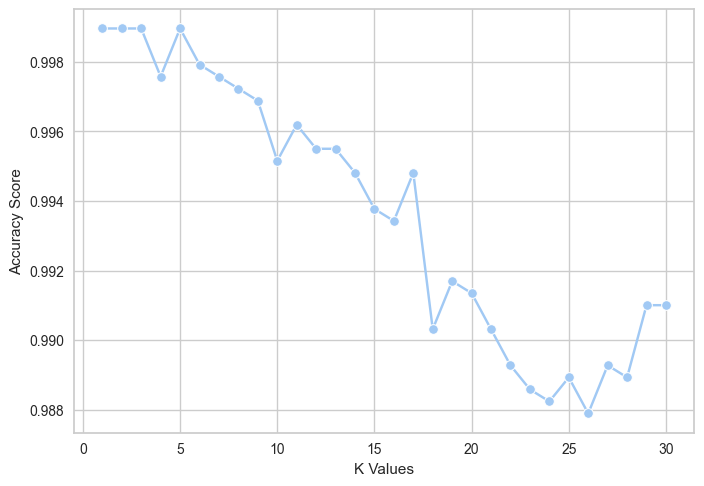

In [31]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [32]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Specify average method
recall = recall_score(y_test, y_pred, average='macro')  # Specify average method

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [34]:
df_0.drop(columns='cluster',inplace=True)

In [35]:
df_0['cluster']=knn.predict(df_0[features])

In [36]:
df_0.cluster.value_counts()

Free Night with Hotel Perk    1668
Free Flight Discount           484
Free Hotel Discount            378
Free Hotel Meal Perk           121
Name: cluster, dtype: int64

In [37]:
df_1.groupby('cluster')[features].mean()

,cancel,free_hotel_meal,free_bags,free_night_with_flight,free_hotel_discount,free_flight_discount
cluster,,,,,,
Cancellation Perk,4.000000,27.476364,0.203636,4.043636,1.658182,6.120000
Free Bags Perks,0.052009,14.418440,8.359338,25.650118,3.491726,5.125296
Free Flight Discount,0.082707,12.641604,0.581454,23.335840,2.714286,54.375940
Free Hotel Discount,0.161972,24.323944,0.253521,20.049296,51.380282,6.352113
Free Hotel Meal Perk,0.043114,64.000000,0.000000,6.101796,1.926946,1.786826
Free Night with Hotel Perk,0.111111,10.137778,0.000000,64.000000,3.440000,5.438519


In [38]:
df_all.columns

Index(['user_id', 'total_clicks', 'total_sessions', 'total_bags',
       'total_hotel_spend', 'total_flights_spend', 'ads_per_km', 'recency',
       'frequency', 'age', 'gender', 'married', 'has_children',
       'total_cancellation', 'avg_session_time',
       'total_num_of_flight_discount', 'total_flight_bookings',
       'avg_flight_discount_amount', 'median_flight_discount_amount',
       'mode_flight_discount_amount', 'max_flight_discount_amount',
       'min_flight_discount_amount', 'total_num_of_hotel_discount',
       'total_hotel_bookings', 'avg_hotel_discount_amount',
       'median_hotel_discount_amount', 'mode_hotel_discount_amount',
       'max_hotel_discount_amount', 'min_hotel_discount_amount',
       'total_num_of_flight_discount_discarded',
       'avg_flight_discount_amount_discarded',
       'total_num_of_hotel_discount_discarded',
       'avg_hotel_discount_amount_discarded',
       'flight_discount_leads_to_hotel_booking',
       'hotel_discount_leads_to_flight_boo

In [39]:
# important_features=['total_clicks', 'total_sessions', 'total_bags',
#        'total_hotel_spend', 'total_flights_spend', 'ads_per_km','frequency', 'age', 'gender', 'married', 'has_children',
#        'total_cancellation', 'avg_session_time',
#        'total_num_of_flight_discount', 'total_flight_bookings',
#        'avg_flight_discount_amount','total_num_of_hotel_discount',
#        'total_hotel_bookings', 'avg_hotel_discount_amount', 'flight_plus_hotels', 'flights_with_bags_morethan_seats',
#        'flights_with_morethan_onebag', 'average_nights', 'flights_money_saved',
#        'hotels_money_saved','total_hotel_net_spend',
#        'total_flight_net_spend', 'total_net_spend', 'discount_hotel_propotion',
#        'discount_flight_propotion']

In [40]:
important_features=['average_nights','flights_with_bags_morethan_seats','flight_plus_hotels','total_amount_of_hotel_discount','hotels_money_saved','total_amount_of_flight_discount','flights_money_saved','cancellation_ratio',
 'total_net_spend', 'discount_hotel_propotion',
'discount_flight_propotion','total_hotel_spend', 'total_flights_spend','frequency','cluster']

In [41]:
df_0.groupby('cluster')[important_features].mean()

,average_nights,flights_with_bags_morethan_seats,flight_plus_hotels,total_amount_of_hotel_discount,hotels_money_saved,total_amount_of_flight_discount,flights_money_saved,cancellation_ratio,total_net_spend,discount_hotel_propotion,discount_flight_propotion,total_hotel_spend,total_flights_spend,frequency
cluster,,,,,,,,,,,,,,
Free Flight Discount,2.052355,0.0,1.754132,0.007541,1.448347,0.108161,34.971074,0.006184,2175.453223,0.050792,0.429098,1101.973140,1109.899504,4.365702
Free Hotel Discount,2.855238,0.0,2.042328,0.111508,68.632275,0.027381,8.187831,0.004618,2685.472831,0.495150,0.102293,1683.298942,1078.993995,4.960317
Free Hotel Meal Perk,3.611570,0.0,0.000000,0.000000,0.000000,0.000413,0.074380,0.000000,1330.320744,0.000000,0.008264,1155.619835,174.775289,1.330579
Free Night with Hotel Perk,2.484688,0.0,1.915468,0.005606,1.025180,0.002278,0.626499,0.006436,2228.372224,0.036331,0.021123,1211.656475,1018.367428,4.496403


In [42]:
df_1.groupby('cluster')[important_features].mean()

,average_nights,flights_with_bags_morethan_seats,flight_plus_hotels,total_amount_of_hotel_discount,hotels_money_saved,total_amount_of_flight_discount,flights_money_saved,cancellation_ratio,total_net_spend,discount_hotel_propotion,discount_flight_propotion,total_hotel_spend,total_flights_spend,frequency
cluster,,,,,,,,,,,,,,
Cancellation Perk,4.686182,0.025455,0.927273,0.019273,24.112727,0.033455,46.665455,0.230496,6153.128909,0.116364,0.148182,2443.116364,3780.790727,4.869091
Free Bags Perks,3.251939,1.044917,2.791962,0.043144,28.288416,0.051773,18.638298,0.005760,3528.630024,0.132146,0.138523,2217.371158,1358.185579,6.418440
Free Flight Discount,3.067093,0.072682,2.639098,0.034085,24.869674,0.272303,180.538847,0.009496,3809.362180,0.118194,0.509130,2111.027569,1903.743133,6.208020
Free Hotel Discount,4.355739,0.031690,2.422535,0.246317,346.302817,0.047535,22.704225,0.014411,4283.852817,0.518503,0.139529,3347.133803,1305.726056,6.147887
Free Hotel Meal Perk,8.291341,0.000000,1.191617,0.023892,39.500599,0.020539,8.513772,0.005443,4511.527138,0.142894,0.093952,3674.013174,885.528335,3.637126
Free Night with Hotel Perk,2.827407,0.000000,4.354074,0.048298,26.520000,0.058073,19.420741,0.010293,4779.218133,0.103277,0.110631,2816.697778,2008.461096,9.297778


- When comparing the newly introduced perks for the unassigned perk between hotel discounts stays and flight discounts, it's evident that distinct preferences have been allocated to these perks. Conversely, for the perks of complimentary hotel meals and free nights with flight bookings, the selection seems to prioritize the most fitting option for each perk.



In [43]:
df_final= pd.concat([df_1, df_0], axis=0)
df_final.shape

(5542, 86)

In [44]:
df_final.groupby('cluster').mean()

,user_id,total_clicks,total_sessions,total_bags,total_hotel_spend,total_flights_spend,ads_per_km,recency,frequency,age,gender,married,has_children,total_cancellation,avg_session_time,total_num_of_flight_discount,total_flight_bookings,avg_flight_discount_amount,median_flight_discount_amount,mode_flight_discount_amount,max_flight_discount_amount,min_flight_discount_amount,total_num_of_hotel_discount,total_hotel_bookings,avg_hotel_discount_amount,median_hotel_discount_amount,mode_hotel_discount_amount,max_hotel_discount_amount,min_hotel_discount_amount,total_num_of_flight_discount_discarded,avg_flight_discount_amount_discarded,total_num_of_hotel_discount_discarded,avg_hotel_discount_amount_discarded,flight_discount_leads_to_hotel_booking,hotel_discount_leads_to_flight_booking,total_travelled_miles,flight_plus_hotels,flights_with_bags_morethan_seats,flights_with_morethan_onebag,average_nights,flights_money_saved,hotels_money_saved,converted,condition,total_hotel_net_spend,total_flight_net_spend,total_net_spend,discount_hotel_propotion,discount_flight_propotion,married&has_children,home_country_encoded,home_city_encoded,home_airport_encoded,total_clicks_b,recency_b,frequency_b,age_b,avg_session_time_b,cancellation_ratio,cancellation_ratio_b,average_nights_b,total_hotel_bookings_b,total_hotel_net_spend_b,total_flight_bookings_b,flights_with_bags_morethan_seats_b,flights_with_morethan_onebag_b,total_flight_net_spend_b,flight_plus_hotels_b,total_net_spend_b,avg_flight_discount_amount_b,total_amount_of_flight_discount,total_amount_of_flight_discount_b,flight_money_saved_b,discount_flight_propotion_b,avg_hotel_discount_amount_b,total_amount_of_hotel_discount,total_amount_of_hotel_discount_b,hotels_money_saved_b,discount_hotel_propotion_b,free_hotel_meal,free_bags,free_night_with_flight,free_hotel_discount,free_flight_discount,cancel
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Cancellation Perk,541941.498182,278.658182,8.203636,2.141818,2443.116364,3780.790727,0.003050,58.505455,4.869091,37.680000,0.138182,0.392727,0.367273,1.050909,842.954707,0.229091,1.472727,0.033091,0.033091,0.033091,0.033091,0.033091,0.192727,1.294545,0.018455,0.018455,0.018364,0.018545,0.018364,1.083636,0.094145,0.741818,0.058895,0.036364,0.087273,7584.019376,0.927273,0.025455,0.181818,4.686182,46.665455,24.112727,1.0,2.578182,2419.003636,3734.125273,6153.128909,0.116364,0.148182,0.170909,0.821818,51.007273,76.861818,2.723636,1.138182,1.178182,0.720000,2.985455,0.230496,2.000000,4.021818,0.934545,3.585455,2.330909,0.050909,0.178182,5.316364,1.323636,5.181818,1.029091,0.033455,1.043636,1.200000,1.181818,0.629091,0.019273,0.360000,0.803636,0.916364,27.476364,0.203636,4.043636,1.658182,6.120000,4.000000
Free Bags Perks,545526.482270,149.014184,8.191489,3.408983,2217.371158,1358.185579,0.003133,65.529551,6.418440,42.981087,0.132388,0.468085,0.314421,0.052009,161.426042,0.408983,3.163121,0.048522,0.048522,0.047754,0.049291,0.047754,0.416076,3.151300,0.037175,0.037175,0.035106,0.039243,0.035106,0.886525,0.081078,0.654846,0.056454,0.042553,0.056738,6612.316142,2.791962,1.044917,1.082742,3.251939,18.638298,28.288416,1.0,2.971631,2189.082742,1339.547281,3528.630024,0.132146,0.138523,0.203310,0.827423,54.498818,78.283688,1.640662,1.271868,1.836879,1.092199,1.678487,0.005760,0.052009,3.052009,3.028369,3.817967,5.151300,2.000000,1.000000,3.917258,4.505910,3.869976,1.543735,0.051773,1.624113,1.070922,0.924350,1.184397,0.043144,1.026005,1.078014,0.938534,14.418440,8.359338,25.650118,3.491726,5.125296,0.052009
Free Flight Discount,546227.434881,141.541336,8.195923,1.454134,1557.933182,1468.612537,0.016229,78.612684,5.198188,42.006795,0.122310,0.458664,0.320498,0.064553,165.531397,1.107588,2.655719,0.153775,0.153284,0.145810,0.162344,0.145696,0.206116,2.413364,0.018262,0.018262,0.017950,0.018573,0.017950,0.964892,0.087818,0.687429,0.058740,0.044168,0.045300,6366.904228,2.154020,0.032843,0.081540,2.510883,100.748584,12.031710,1.0,2.7

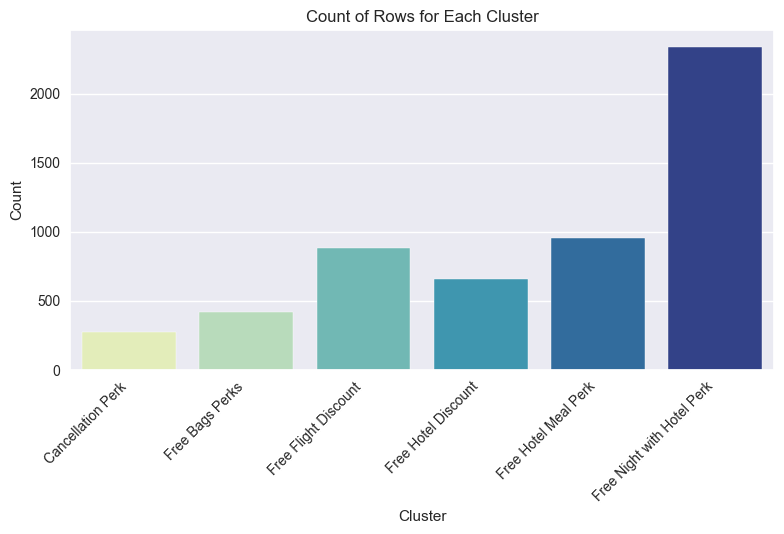

In [45]:
sns.set_style('darkgrid')
cluster_counts = df_final.groupby('cluster').size()

sns.barplot(x=cluster_counts.index, y=cluster_counts,palette='YlGnBu')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.title('Count of Rows for Each Cluster')
plt.tight_layout()
plt.show()

In [46]:
important_features

['average_nights',
 'flights_with_bags_morethan_seats',
 'flight_plus_hotels',
 'total_amount_of_hotel_discount',
 'hotels_money_saved',
 'total_amount_of_flight_discount',
 'flights_money_saved',
 'cancellation_ratio',
 'total_net_spend',
 'discount_hotel_propotion',
 'discount_flight_propotion',
 'total_hotel_spend',
 'total_flights_spend',
 'frequency',
 'cluster']

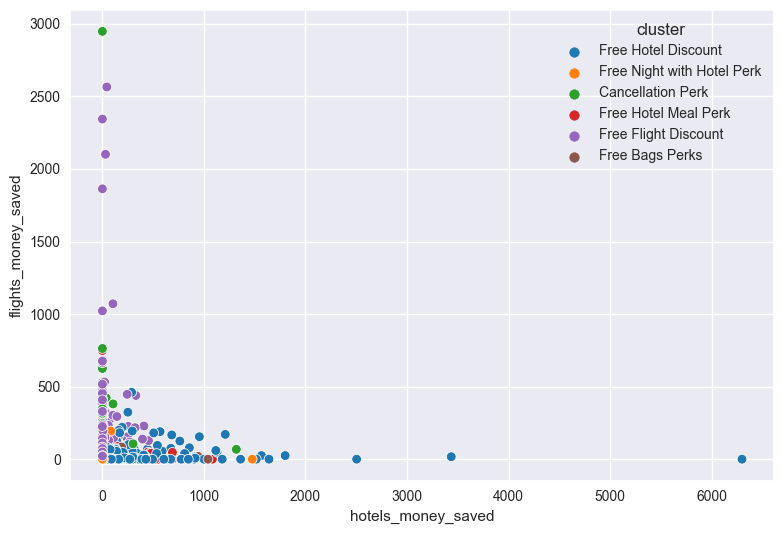

In [47]:
sns.scatterplot(x=df_final.hotels_money_saved,y=df_final.flights_money_saved,hue=df_final.cluster,palette='tab10')
plt.tight_layout()
plt.show()

In [48]:
FT=['average_nights','flights_with_bags_morethan_seats','flight_plus_hotels','total_amount_of_hotel_discount','total_amount_of_flight_discount','cancellation_ratio','total_net_spend','cluster']

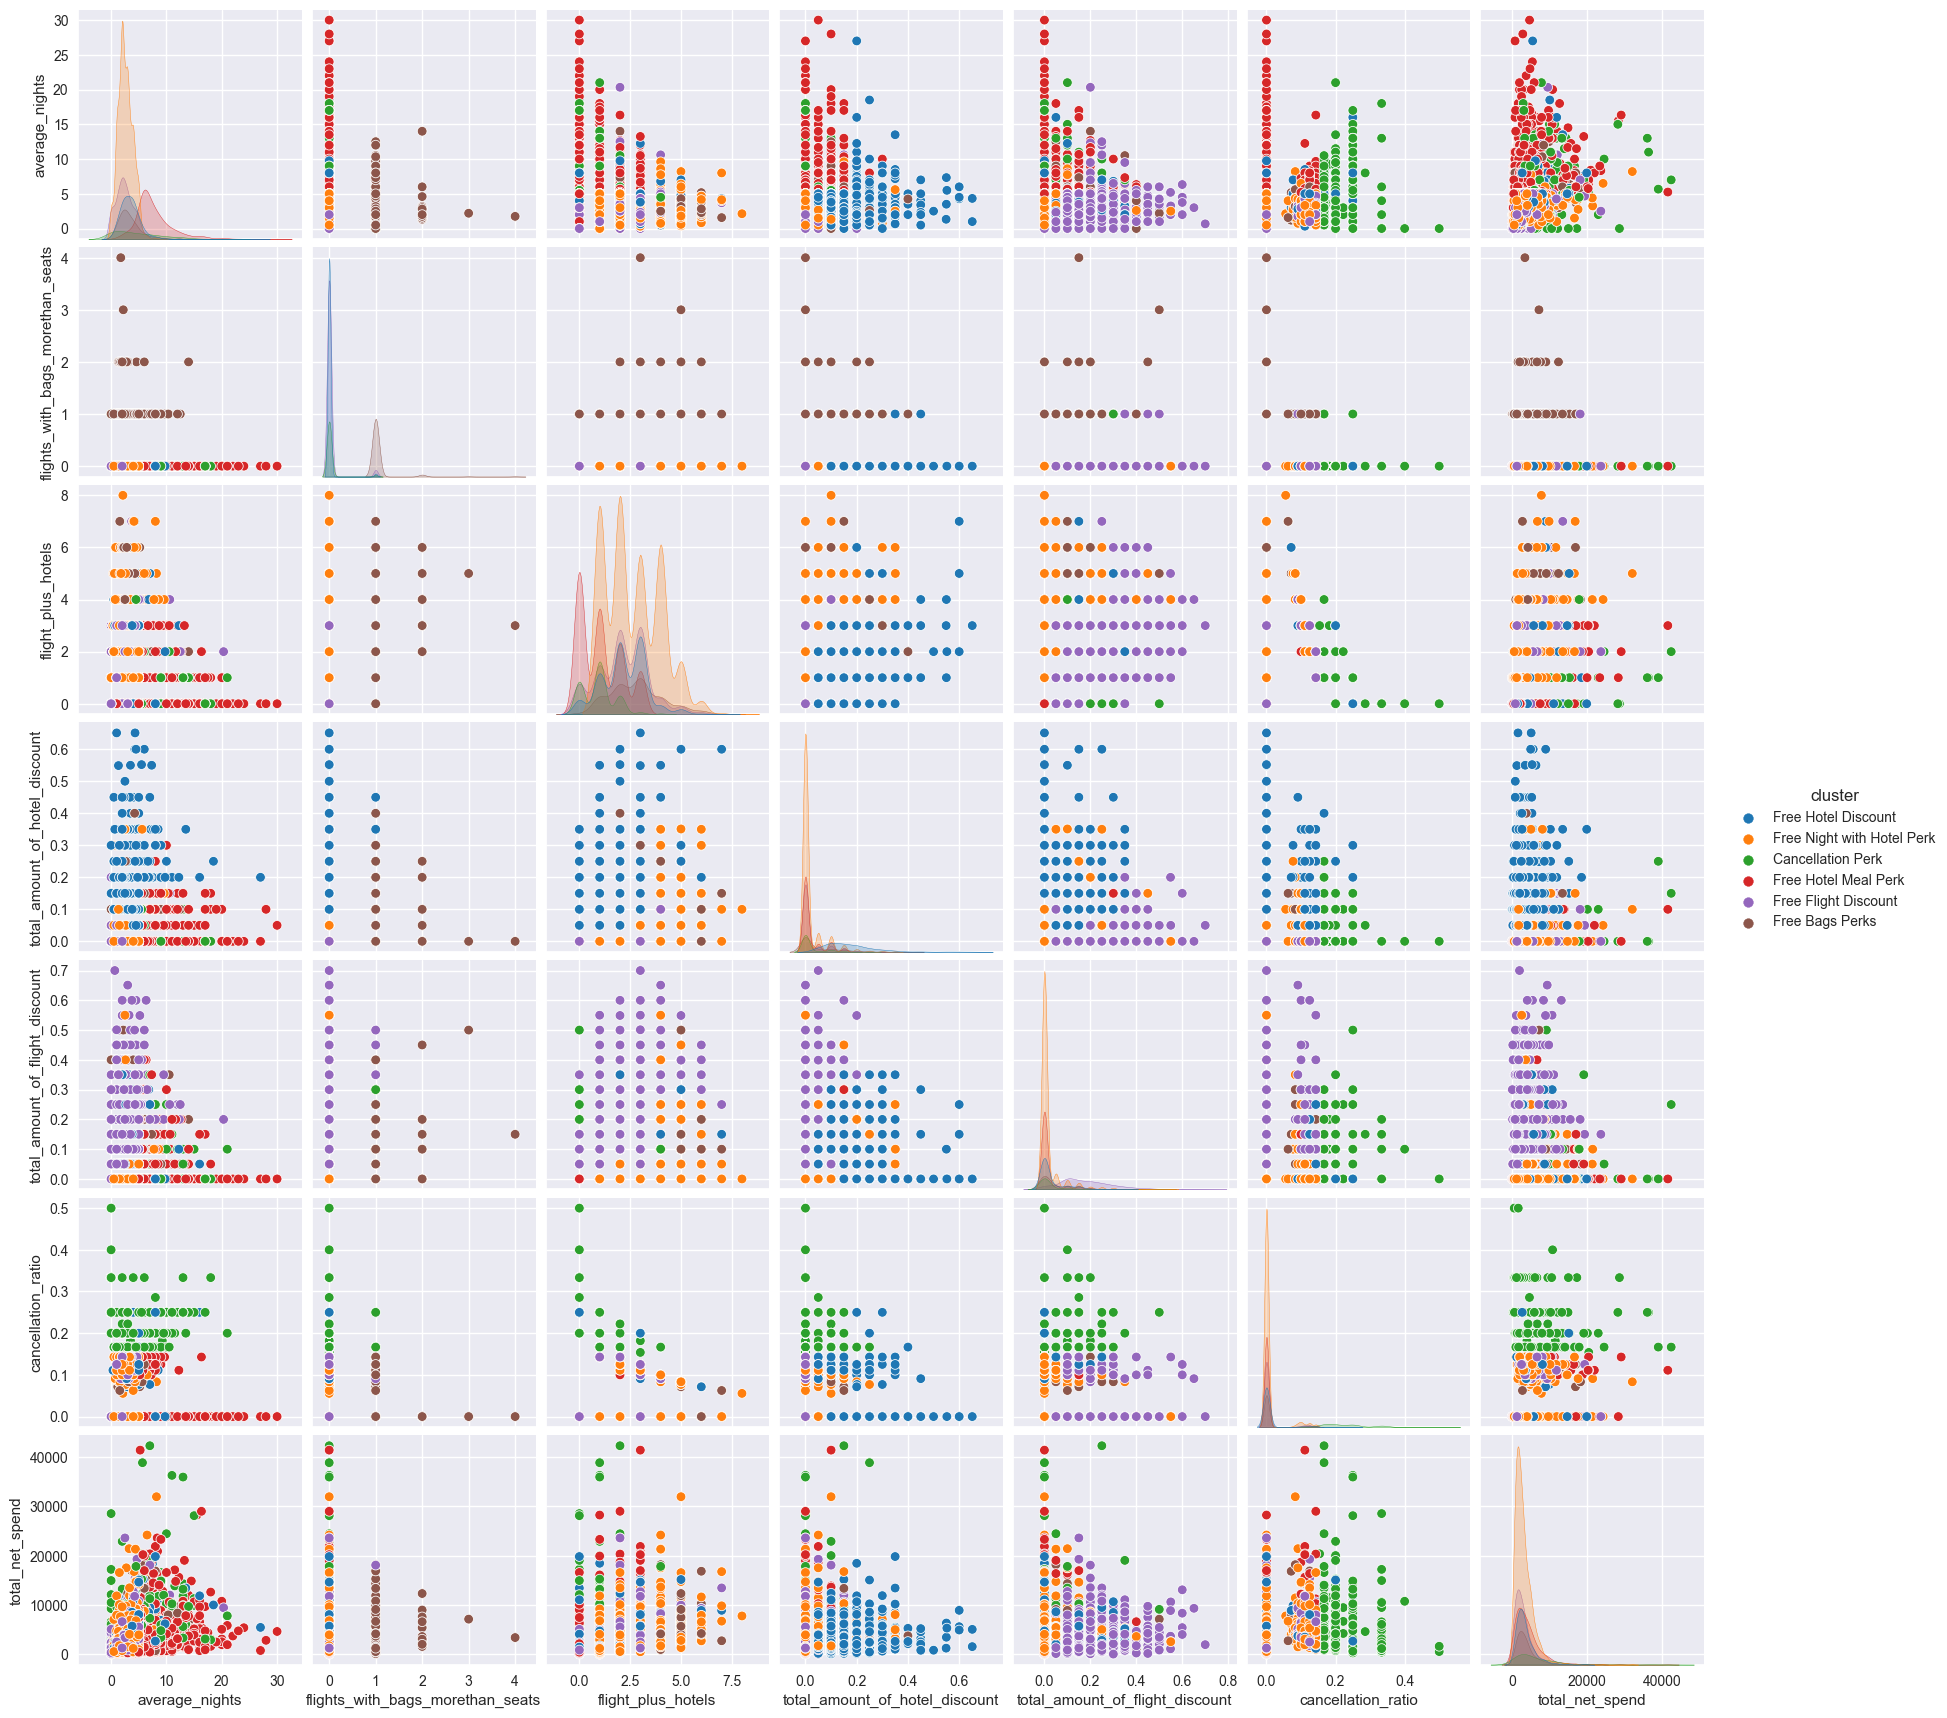

In [49]:
# Plot pairplot with hue as 'cluster'
sns.pairplot(df_final[FT], hue='cluster', palette='tab10')
plt.show()

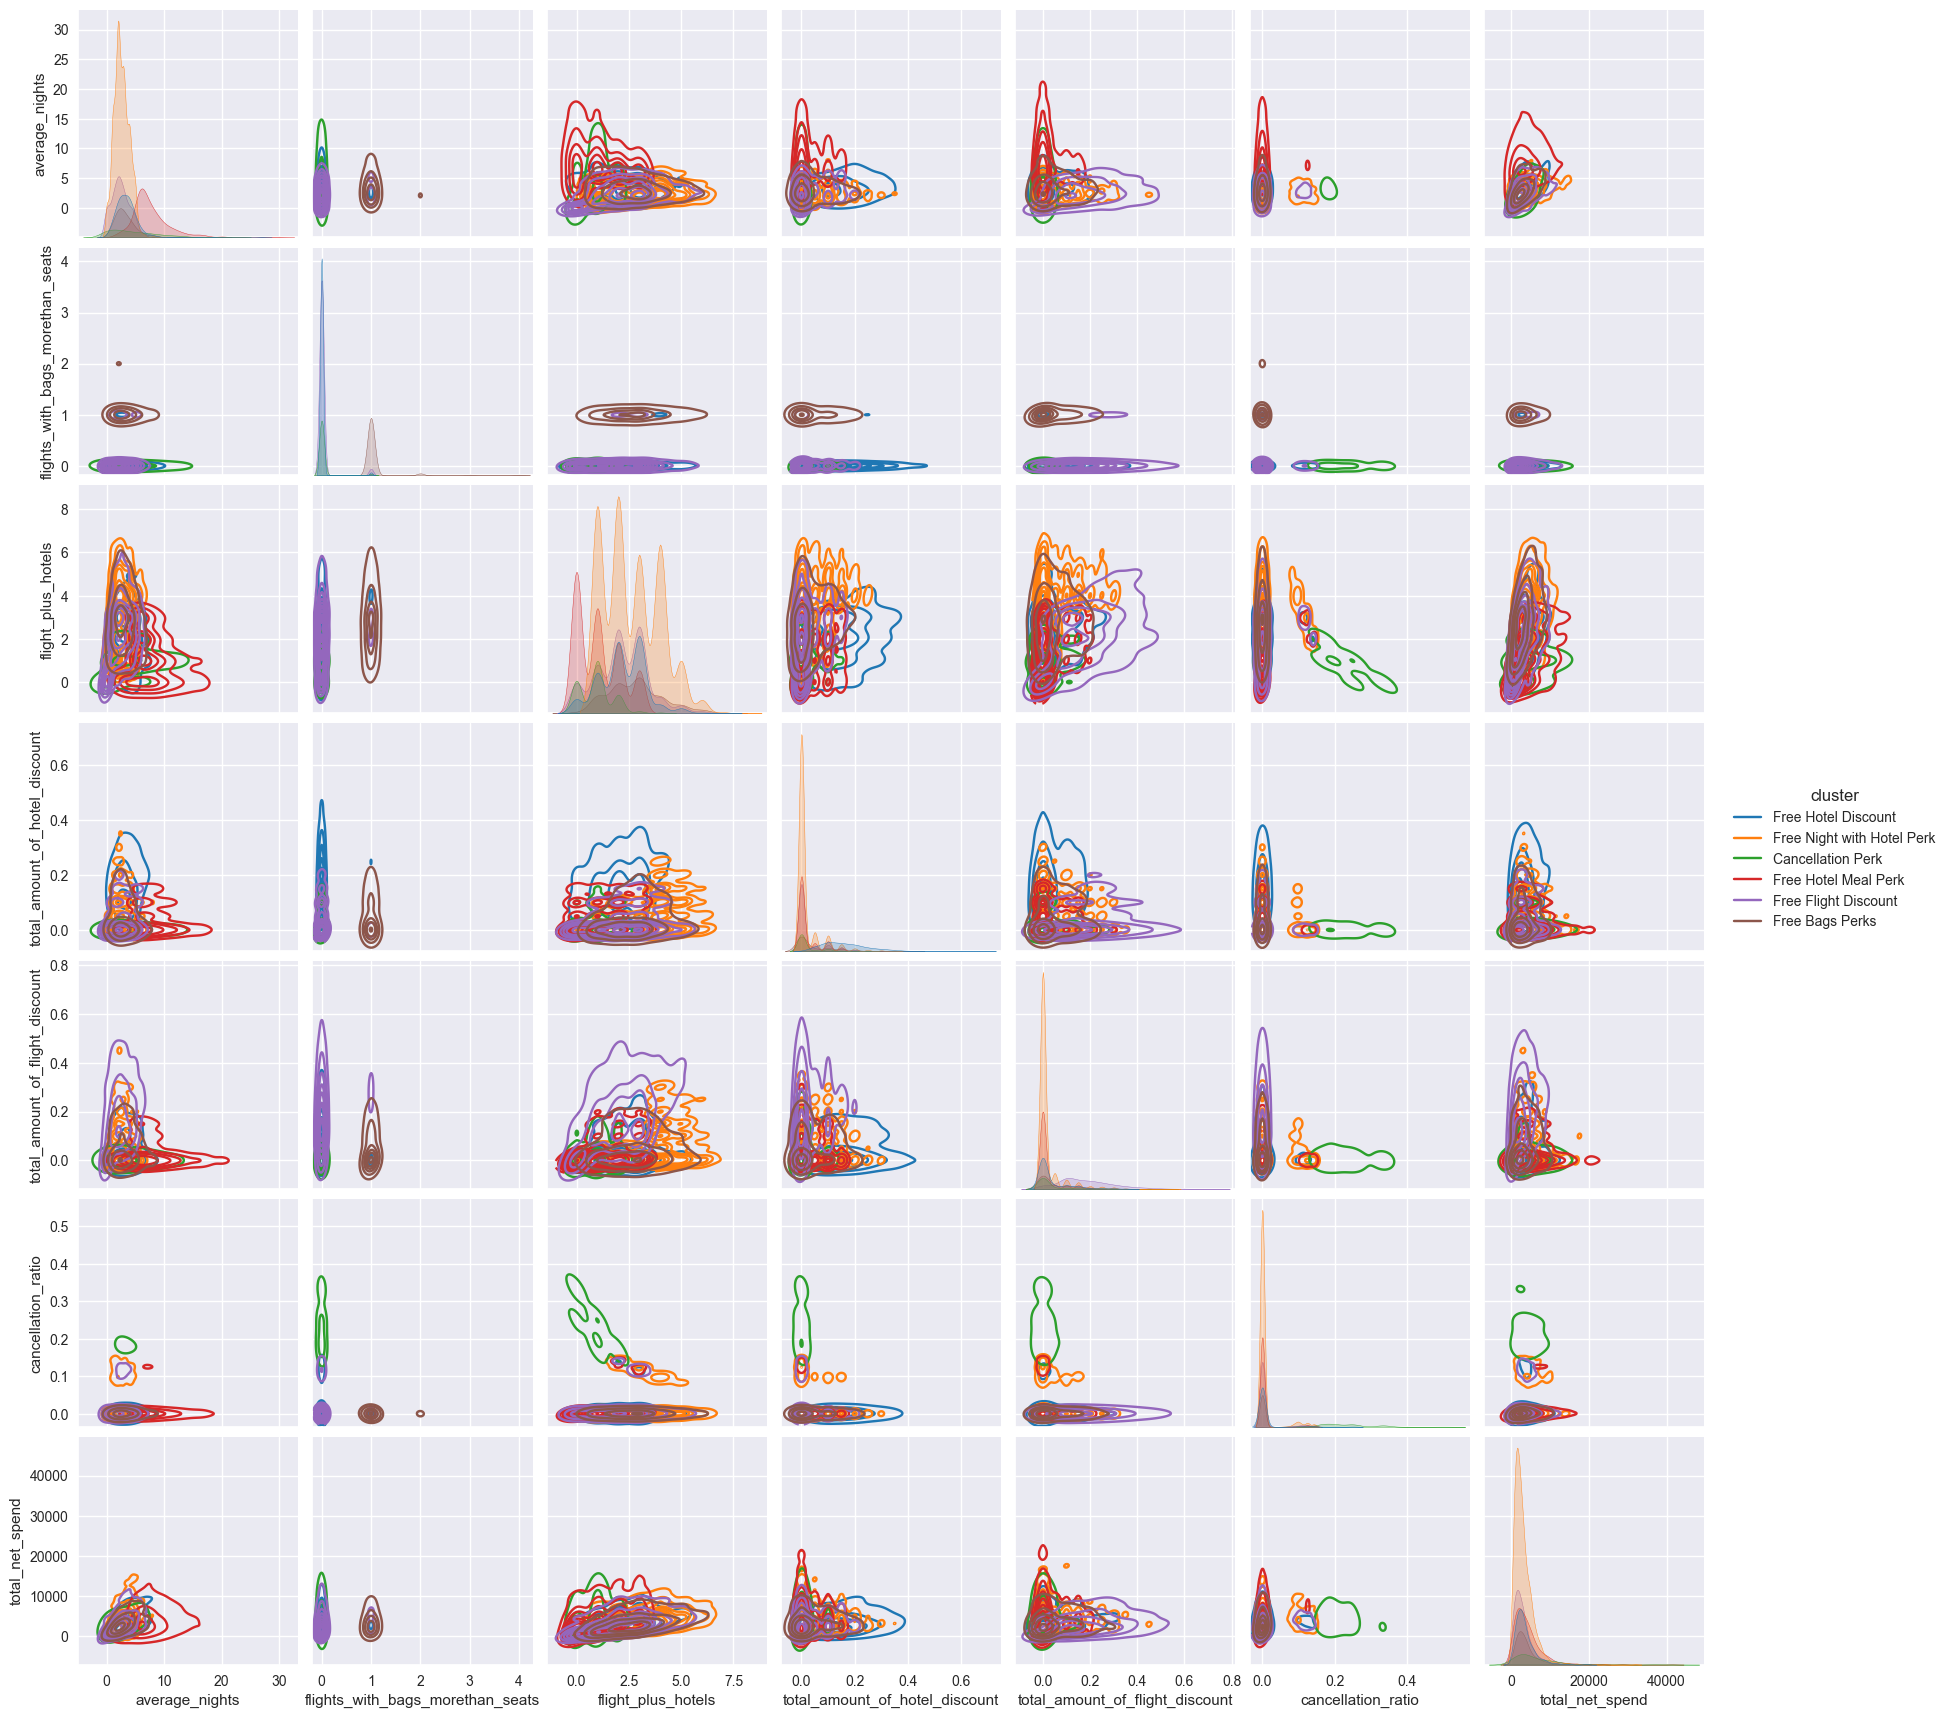

In [50]:
# Plot pairplot with hue as 'cluster'
sns.pairplot(df_final[FT], hue='cluster', palette='tab10',kind='kde')
plt.show()